In [ ]:
import plotly.express as px

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#datetime
from datetime import datetime
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

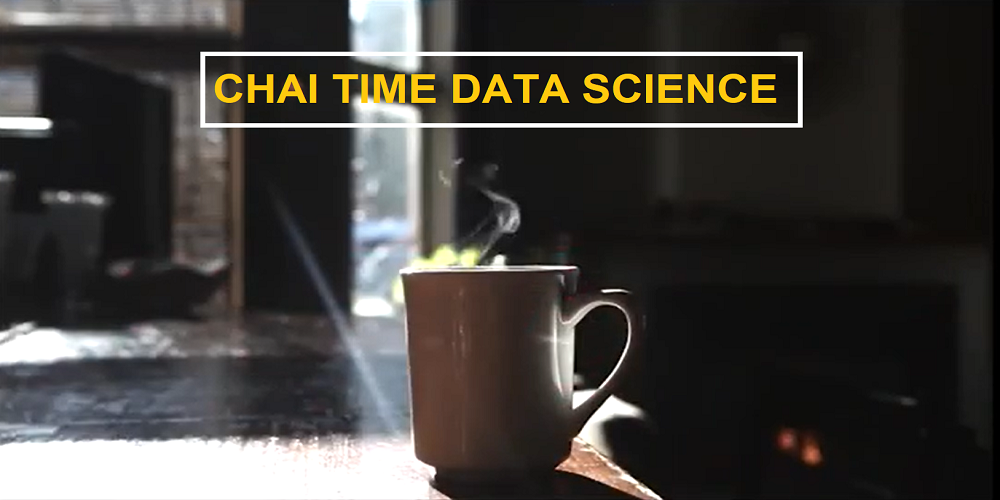

**Chai Time Data Science Show**, is a podcast series by me. I am **Sanyam Bhutani**, the founder and the host (all in one) of this show. I had started on 21 July 2019. The first episode was released on 22 July 2019 with Kaggle 4X GM **Abhishek Thakur**.

The show consists of interviews with ML Heroes: Kagglers, Practitioners and Researchers. If you haven't yet watched an episode, you can find all of them via the links [here](https://www.youtube.com/channel/UCRjtBP-o5FbgRzX2BHQEFtQ). The podcast is a service to the community and contains no ads with a bi-weekly release schedule.

Few days back I have released 100th episode of my show. When I noticed the subscribers count I remembered a forecasting. I have seen that is close to my subscribers count. I recieved the forcasting few months ago when I put my channel's dataset to Kaggle for getting insights. 

**Let me tell you the whole story.**

I had recieved that forcasting and other insights from a Kaggler and I had taken some actions. For those insights are the main reason why I am here. I am mentioning those anlysis below.


This analysis has divided into 2 parts. The parts are basically the analysis in 2 plaforms Audio (i.e. Anchor, Spotify, Apple podcasts) and Video (YouTube). We will analysis how some attribute / characteristics / variable affect these platforms.

Every diagram / graph is consist of 2 subsections 
- **Insight** : Includes findings from the diagram.
- **Action** : The actions I had taken.



In [ ]:
episodes = pd.read_csv('/kaggle/input/chai-time-data-science/Episodes.csv', parse_dates=['recording_date', 'release_date'], 
                    infer_datetime_format=True)
yt_thmb = pd.read_csv('/kaggle/input/chai-time-data-science/YouTube Thumbnail Types.csv')

In [ ]:
episodes.head()

We have the above data. Don't you feel it looks incomprehensive? That's why I am here to help you to get interesting insights.

**Let's start.**

# **YouTube**

In [ ]:
data = episodes.groupby('youtube_thumbnail_type')['youtube_ctr'].mean().sort_values(ascending = False)
data.rename({0: 'Type 1', 1: 'Type 2', 2: 'Type 3', 3: 'Type 4' }, inplace = True)
fig = go.Figure(go.Bar(
            x = data.index,
            y=data,       
            width = .7,
           # marker_color = colors,
))

annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data[i] +.2, x=i,
                                text=data.index[i],
                                font=dict(family='Arial', size=15,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data[i] - .2, x=i,
                                text=str(round(data[i],1)) + '%',
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    

legends = ['Type 1: YouTube default image', 'Type 2: YouTube default image with custom annotation',
               'Type 3 : Mini Series: Custom Image with annotations', 'Type 4 : Custom image with CTDS branding, Title and Tags']


for i in range(len(legends)):
    
    annotations.append(dict(xref='x', yref='y',
                                    y=5 - i*.3, x=2.8,
                                xanchor = 'left',yanchor = 'middle',
                                    text= legends[i],
                                    font=dict(family='Arial', size=13,
                                              color='black'),
                                    showarrow=False))

#0: YouTube default image
#1: YouTube default image with custom annotation
#2 : Mini Series: Custom Image with annotations
#3 : Custom image with CTDS branding, Title and Tags



fig.update_layout(
    title = dict(text = '<b>Average YouTube CTR per Thumbnail', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'gray',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)





fig.show()



### **Insights:**
- Thumbnail **Type 4** have got the **highest** CTR. Type 4 thumbnail was 'Custom image with CTDS branding, Title and Tags'.
- Thumbnail **Type 3** have got the **lowest** CTR. Type 3 thumbnail was 'Mini Series: Custom Image with annotation'. It looks like people are **not interested on the Mini Series**.
- I had uploaded the Mini Series because of COVID-19. The result is low CTR.


### **Action:**
- Next upcoming videos thumnails were changed to Type 4. 
- Those type of Mini Series were avoided.

In [ ]:
data = episodes.groupby('category')['youtube_ctr'].mean().sort_values(ascending = False)
#data.rename({0: 'Type 1', 1: 'Type 2', 2: 'Type 3', 3: 'Type 4' }, inplace = True)
fig = go.Figure(go.Bar(
            x = data.index,
            y=data,       
            width = .7,
           # marker_color = colors,
))

annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data[i] +.1, x=i,
                                text=data.index[i],
                                font=dict(family='Arial', size=15,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data[i] - .2, x=i,
                                text=str(round(data[i],2)) + '%',
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    


#0: YouTube default image
#1: YouTube default image with custom annotation
#2 : Mini Series: Custom Image with annotations
#3 : Custom image with CTDS branding, Title and Tags



fig.update_layout(
    title = dict(text = '<b>Average YouTube CTR per Category', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'gray',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)





fig.show()

### **Insights:**
- Videos with **Kagglers** and **Researchers** have got almost **same** CTR.
- Videos with **Industry** people have got the **highest** CTR but not much higher than Kagglers and Researchers.
- Other categories are the **Mini Series**, those got **low** CTR.
- Except "Other", categories don't affect CTR much.

### **Action:**
- Continue with the same but **avoid the "Other" category**.

In [ ]:

data = episodes.groupby('category')[['youtube_nonimpression_views', 'youtube_impression_views']].sum()

top_labels = ['Nonimpression', 'Impression']

gray = 'rgb(211, 211, 211)'
blue = 'rgb(25, 140, 229)'

data = data.loc[['Industry', 'Kaggle', 'Research', 'Other']]

x_data = []

for i in data.index:
    x_data.append(round(((data.loc[i] / data.loc[i].sum())*100),0).astype(int).values)

y_data = list(data.index)

colors = [blue,gray, ]
names = ['Nonimpression', 'Impression']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            name = names[i],
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=0)
            ),
            width = .7
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        autorange = 'reversed',
    ),
    barmode='stack',
    #paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='white',
    #margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
    autosize=False,
    width=750,
    height=400,
    margin=dict(
        l=100,
        r=0,
        b=50,
        t=140,
        pad=0
    ),
)



annotations = []


for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=15,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    if(xd[0]!=0):
        annotations.append(dict(xref='x', yref='y',
                                x=xd[0] / 2, y=yd,
                                text=str(xd[0]) + '%',
                                font=dict(family='Arial', size=14,
                                          color='rgb(248, 248, 255)'),
                                showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0]/2+10, y=1.09,
                                text=top_labels[0],
                                font=dict(family='Arial', size=15,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='black'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=(xd[i]+30), y=1.09,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=15,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

            
fig.update_layout(annotations=annotations, title = dict(text = '<b>YouTube View distribution', font = dict(family = 'Droid Sans', size = 26)))

fig.show()


### **Insights:**

- My videos were getting **more Nonimpression views** than impression views.
- That means videos were not getting more views from YouTube recommendations or search.
- Maximum views were from external advertisements.

### **Action:**

- I kept publishing advertisements and after sometime percentage of impression views increased.

In [ ]:
data = episodes.groupby('category')['youtube_views'].mean().sort_values(ascending = False)
fig = go.Figure(go.Bar(
            x = data.index,
            y=data,       
            width = .7,
           # marker_color = colors,
))




annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data[i] +20, x=i,
                                text=data.index[i],
                                font=dict(family='Arial', size=18,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data[i] - 30, x=i,
                                text=str(int(round(data[i],0))),
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    


fig.update_layout(
    title = dict(text = '<b>Average YouTube views per Category', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'black',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
    
    
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)

fig.show()

In [ ]:
data = episodes.groupby('category')['youtube_likes'].mean().sort_values(ascending = False)
fig = go.Figure(go.Bar(
            x = data.index,
            y=data,       
            width = .7,
           # marker_color = colors,
))




annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data[i] +.8, x=i,
                                text=data.index[i],
                                font=dict(family='Arial', size=18,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data[i] - 1, x=i,
                                text=str(int(round(data[i],0))),
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    


fig.update_layout(
    title = dict(text = '<b>Average YouTube likes per category', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'black',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
    
    
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)

fig.show()

In [ ]:
data = episodes.groupby('category')['youtube_avg_watch_duration'].mean().sort_values(ascending = False)
episodes['retention'] = (episodes['youtube_avg_watch_duration']) / episodes['episode_duration']
data2 = episodes.groupby('category')['retention'].mean().sort_values() * 100
#data3 = (data / data2 * 100)


fig = go.Figure(go.Bar(
            x = data2.index,
            y=data2,       
            width = .7,
           # marker_color = colors,
))




annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data2[i] +1.3, x=i,
                                text=data2.index[i],
                                font=dict(family='Arial', size=17,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data2[i] - 1.5, x=i,
                                text = str(round(data2[i],1)) + "%",
                                #text=str(secondsToText(int(round(data[i],0)))),
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    


fig.update_layout(
    title = dict(text = '<b>YouTube Retention Rate per Category', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'black',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
    
    
    margin=dict(
    l=150,
    r=20,
    b=100,
    t=150,
    pad=0
    ),
    
    
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)

fig.show()

### **Insights:**

- Well, retention rates of my videos were quite low. I think this happens because of my video duration.
- My Mini Series had got more than others, because its watch duration is very less.

### **Action:**

- I started thinking how episode duration effect my videos.

## Anchor

In [ ]:
data = episodes.groupby('anchor_thumbnail_type')['anchor_plays'].mean().sort_values(ascending = False)
data.rename({0: 'Type 1', 1: 'Type 2', 2: 'Type 3', 3: 'Type 4' }, inplace = True)
fig = go.Figure(go.Bar(
            x = data.index,
            y=data,       
            width = .7,
           # marker_color = colors,
))

annotations = []
for i in range(len(data)):

    annotations.append(dict(xref='x', yref='y',
                                y=data[i] +30, x=i,
                                text=data.index[i],
                                font=dict(family='Arial', size=15,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False))
    
    annotations.append(dict(xref='x', yref='y',
                                y=data[i] - 50, x=i,
                                text=str(int(round(data[i],0))),
                                font=dict(family='Arial', size=13,
                                          color='white'),
                                showarrow=False))
    

legends = ['Type 1: YouTube default playlist image', 'Type 2: CTDS Branding',
               'Type 3 : Mini Series: Custom Image with annotations', 'Type 4 : Custom image with CTDS branding, Title and Tags']


for i in range(len(legends)):
    
    annotations.append(dict(xref='x', yref='y',
                                    y=1000 - i*70, x=2.8,
                                xanchor = 'left',yanchor = 'middle',
                                    text= legends[i],
                                    font=dict(family='Arial', size=13,
                                              color='black'),
                                    showarrow=False))

#0: YouTube default image
#1: YouTube default image with custom annotation
#2 : Mini Series: Custom Image with annotations
#3 : Custom image with CTDS branding, Title and Tags



fig.update_layout(
    title = dict(text = '<b>Average Anchor Plays per Thumbnail', font = dict(family = 'Droid Sans', size = 26)),
   yaxis=dict(
    zeroline=True,
    showticklabels=False,
    zerolinecolor = 'gray',
    #domain=[0.01, 0.7],
    ),
   xaxis=dict(
        showticklabels=False,        
    ),
   
    plot_bgcolor= 'white',
    annotations = annotations,
    
)





fig.show()

### **Insights:**

-  Type 1 and Type 2 thumbnails had got more plays.

### **Action:**

- I had removed Type 3 and Type 4 thumbnails.

# **Audio**

## **Spotify**

In [ ]:
episodes['spotify_only_start'] = episodes['spotify_starts'] - episodes['spotify_streams']
data = episodes['spotify_only_start'].copy()
data.index = episodes['release_date'].copy()
data.dropna(inplace = True)

fig = go.Figure()
fig.add_trace(go.Scatter(
                    x = data.index,
                    y = data,
                    mode = "lines",
                    name = "Confirmed Cases",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= '',
                    showlegend= True,
                    line = dict(color = 'rgba(25, 140, 229, 0.8)', width = 3)
                    ))
fig.add_trace(go.Scatter(
        x= [data.index[-1]],
        y= [data[-1]],
        mode='markers',
        name = "Confirmed Cases",
        text = '',
        marker=dict(color='rgba(25, 140, 229, 0.8)', size= 8),
        showlegend= False,
        
    ))

fig.add_trace(go.Scatter(
        x= [data.index[0]],
        y= [data[0]],
        mode='markers',
        name = "Confirmed Cases",
        text = '',
        marker=dict(color='rgba(25, 140, 229, 0.8)', size= 8),
        showlegend= False,
        
    ))

fig.update_layout(
    title = dict(text = '<b>Spotify only start', font = dict(family = 'Droid Sans', size = 26)),
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white'
)


annotations = []

annotations.append(dict(xref='x', yref = 'y', x= data.index[0], y=data[0],
                                  xanchor='left', yanchor='bottom',
                                  text= str(int(data[0])),
                                  font=dict(family='Arial',
                                            size=20),
                                  showarrow=True))

annotations.append(dict(xref='x', yref = 'y', x= data.index[-1], y=data[-1],
                                  xanchor='left', yanchor='bottom',
                                  text= str(int(data[-1])),
                                  font=dict(family='Arial',
                                            size=20),
                                  showarrow=True))

fig.update_layout(annotations=annotations)





fig.show()

### **Insights:**

- I was happy to see the downward trend. From 229 to 7 it's a huge change.
- It looks like listeners are really my episodes.

### **Action:**

- I wanted to verify my thoughts.

In [ ]:

data = episodes['spotify_listeners'].copy()
data.index = episodes['release_date'].copy()
data.dropna(inplace = True)

fig = go.Figure()
fig.add_trace(go.Scatter(
                    x = data.index,
                    y = data,
                    mode = "lines",
                    name = "Confirmed Cases",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= '',
                    showlegend= True,
                    line = dict(color = 'rgba(25, 140, 229, 0.8)', width = 3)
                    ))
fig.add_trace(go.Scatter(
        x= [data.index[-1]],
        y= [data[-1]],
        mode='markers',
        name = "Confirmed Cases",
        text = '',
        marker=dict(color='rgba(25, 140, 229, 0.8)', size= 8),
        showlegend= False,
        
    ))

fig.add_trace(go.Scatter(
        x= [data.index[0]],
        y= [data[0]],
        mode='markers',
        name = "Confirmed Cases",
        text = '',
        marker=dict(color='rgba(25, 140, 229, 0.8)', size= 8),
        showlegend= False,
        
    ))

fig.update_layout(
    title = dict(text = '<b>Spotify listeners', font = dict(family = 'Droid Sans', size = 26)),
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white'
)


annotations = []

annotations.append(dict(xref='x', yref = 'y', x= data.index[0], y=data[0],
                                  xanchor='right', yanchor='bottom',
                                  text= str(int(data[0])),
                                  font=dict(family='Arial',
                                            size=20),
                                  showarrow=True))

annotations.append(dict(xref='x', yref = 'y', x= data.index[-1], y=data[-1],
                                  xanchor='left', yanchor='bottom',
                                  text= str(int(data[-1])),
                                  font=dict(family='Arial',
                                            size=20),
                                  showarrow=True))

fig.update_layout(annotations=annotations)





fig.show()

### **Insights:**

- Spotify listeners had **decreased**.
- They might **started to watch my YouTube videos**.

### **Action:**

- Tried to make the episodes more interesting for listeners also.

# **Conclusion:**

There were several mistake that I had made before tht competition. The competion worked as a eye opener for me.


This notebook contains only those visuals from that Kaggler which had helped me to reach this position. I do not saying this is the only Kaggler whose visuals helped me. There are other amazing kernels also.

NOTE: The story is written by Marshal Baskey. Sorry Mr. Bhutani I have just wanted to create a story.